# EXPLORATORY DATA ANALYSIS 📊
## STROKE DATASET 🩺

In [1]:
# importing defined libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import *
from scipy import stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest as ztest

#### IMPORT DATA

In [2]:
Stroke_df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')

#### DATA EXPLORATION & CLEANING

In [8]:
Stroke_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
Stroke_col=list(Stroke_df.columns)
print(Stroke_col)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [10]:
print('Total no. of rows & cols:',Stroke_df.shape)

Total no. of rows & cols: (5110, 12)


In [12]:
print("Statistics Summary:")
Stroke_df.describe().T

Statistics Summary:


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
"""
Here we can see that,
(i)  AGE is slightly left skewed as its median(2nd Quartile) > mean
(ii) AVG_GLUCOSE_LEVEL is notably right skewed
"""

In [13]:
Stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
print('Total null/NaN values present in each variable:')
Stroke_df.isnull().sum()

Total null/NaN values present in each variable:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
print('Total # Before dropping NA:', Stroke_df['id'].count())
Stroke_df.dropna(axis=0,how='any', inplace=True)
print('Total # After dropping NA:', Stroke_df['id'].count())

Total # Before dropping NA: 5110
Total # After dropping NA: 4909


#### UNIVARIATE STATISTICS

BMI: The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.\
Formula = Weigh(kg)/Heigh^2(m) \
BMI Healthy Range: 18.5 to 24.9 \
Glucose level Healthy Range: 80 - 120 mg/dL \
Useful link: [BMI](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/), [Average glucose level](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=Rationale%3A,(5.6%20mmol%2FL).)

In [19]:
""" You can choose any numerical variable. Here, I've chosen avg_glucose_level & bmi """

print('avg_glucose_level:')
#Central Tendancy
print('Mean avg_glucose_level:',mean(Stroke_df['avg_glucose_level']))
print('Median avg_glucose_level:',median(Stroke_df['avg_glucose_level']))

#variable distribution
print('S.D. avg_glucose_level:',pstdev(Stroke_df['avg_glucose_level']))
print('variance avg_glucose_level:',variance(Stroke_df['avg_glucose_level']))
print('\n')

# Additional information,
print('BMI:')
#Central Tendancy
print('Mean bmi:',mean(Stroke_df['bmi']))
print('Median bmi:',median(Stroke_df['bmi']))

#variable distribution
print('S.D. bmi:',pstdev(Stroke_df['bmi']))
print('variance bmi:',variance(Stroke_df['bmi']))

avg_glucose_level:
Mean avg_glucose_level: 105.3051497249949
Median avg_glucose_level: 91.68
S.D. avg_glucose_level: 44.419815645303075
variance avg_glucose_level: 1973.5220431570808


BMI:
Mean bmi: 28.893236911794663
Median bmi: 28.1
S.D. bmi: 7.8532667228810755
variance bmi: 61.68636419426886


In [21]:
IQR = stats.iqr(Stroke_df['avg_glucose_level'], interpolation = 'midpoint')
print('IQR of avg_glucose_level:', IQR)

""" since Pandas have a better performance when the number of rows is 500K or more. 
    Numpy has a better performance when number of rows is 50K or less. """

Q1 = np.quantile(Stroke_df['avg_glucose_level'], .25, axis = 0, keepdims = True)
Q3 = np.quantile(Stroke_df['avg_glucose_level'], .75, axis = 0, keepdims = True)

print('Range of avg_glucose_level without outliers: {0} to {1}'.format(Q1-1.5*IQR,Q3+1.5*IQR))

IQR of avg_glucose_level: 36.5
Range of avg_glucose_level without outliers: [22.32] to [168.32]


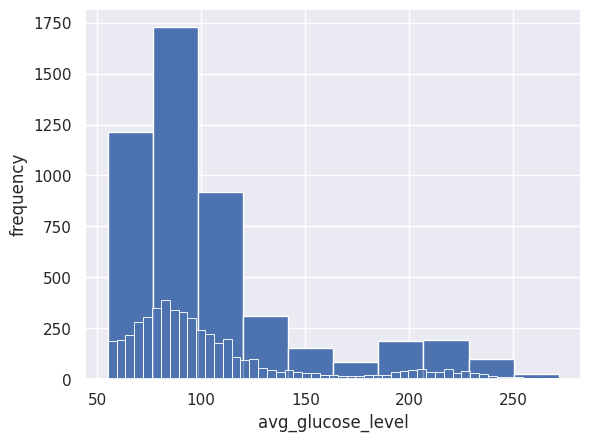

In [34]:

plt.hist(Stroke_df['avg_glucose_level'])

sns.set()
h = sns.histplot(Stroke_df['avg_glucose_level'], bins='auto')
plt.xlabel('avg_glucose_level')
plt.ylabel('frequency')

plt.show()

In [ ]:
"""From the above histogram we can see that,
(i)   We have more no. of patients with glucose range 50-100 mg/dL
(ii)  And few patients <20 in the range 250 mg/dL & above
(iii) And No patients <50 which looks understandable."""

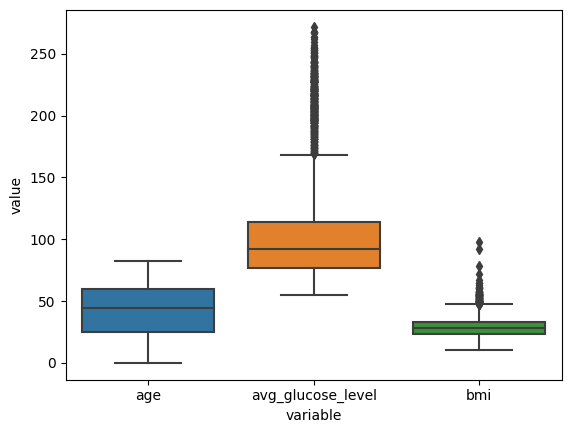

In [91]:
sns.boxplot(x="variable", y="value", data=pd.melt(Stroke_df_f[['age','avg_glucose_level','bmi']]))

plt.show()

In [ ]:
"""From the above boxplot we can see that,
(i)  avg_glucose_level & bmi do have some outliers. 
     But we can't rule out the possibility of patient having glucose level >250 and higher BMI."""

Text(0.5, 0, 'avg_glucose_level')

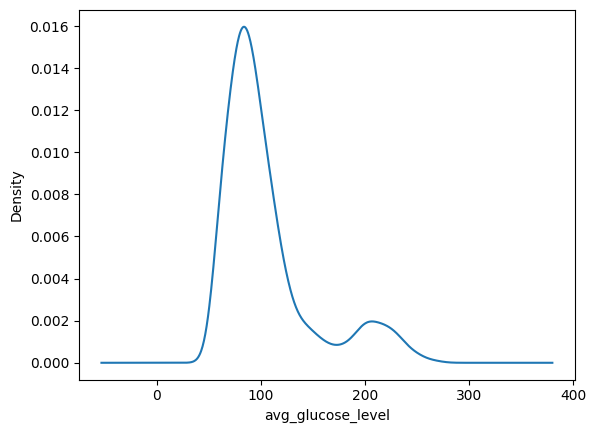

In [94]:
#plot distribution of values in points column
dist_plot=Stroke_df_f['avg_glucose_level'].plot(kind='kde')

dist_plot.set_xlabel("avg_glucose_level")

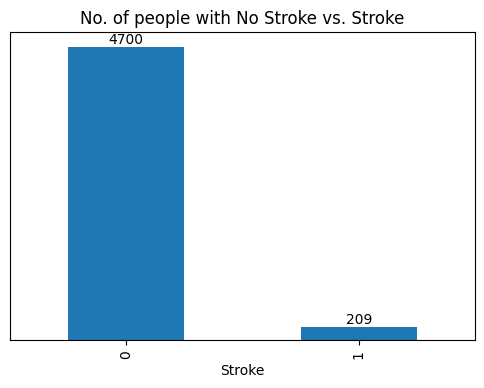

In [86]:
ax = Stroke_df['stroke'].value_counts().plot(kind='bar',
                                         figsize=(6,4),
                                         title="No. of people with No Stroke vs. Stroke")
ax.set_xlabel("Count of people")
ax.set_ylabel("Frequency")
plt.yticks(np.arange(0,5000, 100))
for bars in ax.containers:
    ax.bar_label(bars)
ax.axes.get_yaxis().set_visible(False)
plt.show()

### BIVARIATE ANALYSIS

In [62]:
Stroke_df_f = Stroke_df. select_dtypes(include = ['float','int64'])

                                            """ CORRELATION TEST """
    
# Correlation table:
Stroke_df_f.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [ ]:
""" From the above table we can see that,
    (i)  There exists strong positive correlation for age with avg_glucose_level, bmi and hypertension as well.
    (ii) And also little +ve correlation between bmi and stroke <0.05 """

<Axes: title={'center': 'bmi vs. avg_glucose_level'}, xlabel='bmi', ylabel='avg_glucose_level'>

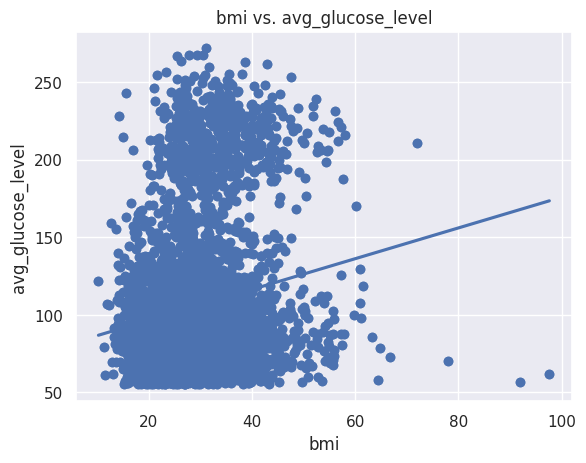

In [60]:
plt.scatter(Stroke_df['bmi'], Stroke_df['avg_glucose_level'])
plt.title('bmi vs. avg_glucose_level')
plt.xlabel('bmi')
plt.ylabel('avg_glucose_lvl')

# use regplot
sns.regplot(x = "bmi",
            y = "avg_glucose_level", 
            ci = None,
            data = Stroke_df)

In [ ]:
"""From the above scatter plot we can see that,
(i)  With bmi ↑, average glucose level ↑ as well. """

### MULTIVARIATE ANALYSIS

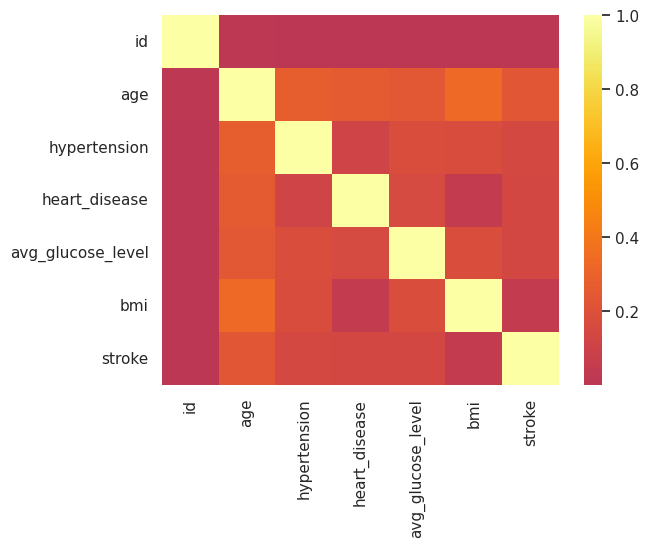

In [65]:
sns.heatmap(Stroke_df_f.corr(), center=0, cmap='inferno', robust=True)
plt.show()

In [22]:
"""From the above heatmap, we can infer that
(i)  Age exhibits strong positive linear correlation with factors such as hypertension, bmi, avg_glucose_level
(ii) Also with increased bmi level, we see a prominent increase in avg_glucose_level"""

'From the above heatmap, we can infer that\n(i)  Age exhibits strong positive linear correlation with factors such as hypertension, bmi, avg_glucose_level\n(ii) Also with increased bmi level, we see a prominent increase in avg_glucose_level'

#### UNIVARIATE STATISTICAL ANALYSIS

In [9]:
# For reference
Stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Taking a sample of # 25 rows
Stroke_df_smpl=Stroke_df.sample(n=25)
print('Mean of Population avg_glucose_level:', round(Stroke_df['avg_glucose_level'].mean(),2))
print('Mean of Sample avg_glucose_level:', Stroke_df_smpl['avg_glucose_level'].mean())


Mean of Population avg_glucose_level: 106.15
Mean of Sample avg_glucose_level: 105.54439999999998


In [ ]:
"""
    --> From the above values, we can clearly see that half of population are either pre-diabetic or 
        diabetic (>100 mg/dL).
        And I'm going to do a sample proportion hypothesis test below.
                                                                         """


In [5]:
"""
                                       ONE SAMPLING PROPORTION MEAN HYPOTHESIS TEST
                                       
    Conditions: Sample should be random and sample size, n<30
    Null Hypothesis Ho: Half of population are either pre-diabetic or diabetic
    Alternate Hypothesis Ha: Half of population are neither pre-diabetic or diabetic
    confidence level, α is 0.05 or 5%
                                                                                       """
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Stroke_df_smpl['avg_glucose_level'],Stroke_df['avg_glucose_level'].mean())
print('P-value: ', p_value)

if p_value>0.05:
    print("Fail to reject null hypothesis")
else:
    print("Accepting alternate hypothesis")

P-value:  0.9525445424725865
Fail to reject null hypothesis


In [ ]:
"""
    --> From the above, we can conclude that Half of the population are either pre-diabetic or diabetic.
                                                                                                        """

In [8]:
#Just for my practice I'm going to perform the same hypothesis using Z test.
""" Conditions: Sample should be random and sample size, n>=30 """

from statsmodels.stats.weightstats import ztest as ztest

Stroke_df_smpl=Stroke_df.sample(n=100)
ztest,p_value=ztest(Stroke_df_smpl['avg_glucose_level'],value=Stroke_df['avg_glucose_level'].mean())

if p_value>0.05:
    print("Fail to reject null hypothesis")
else:
    print("Accepting alternate hypothesis")

Fail to reject null hypothesis


In [ ]:
"""
    --> From the above, we can conclude that the same results persists when we use z test as well.
                                                                                                        """

#### BIVARIATE STATISTICAL ANALYSIS

In [ ]:
"""
                                       CHI SQUARE (χ2) INDEPENDENCE HYPOTHESIS TEST
                                       
    Conditions: Expected frequencies of each cell > 5
    Null Hypothesis Ho: stroke is independent of gender
    Alternate Hypothesis Ha: Dependency exists between gender and stroke
    confidence level, α is 0.05 or 5%
                                                                                       """

In [13]:
#creating custom column
Stroke_df['stroke_str']=Stroke_df['stroke'].apply(lambda x: 'stroke_negative' if x==0 else 'stroke_positive')
#creating crosstab to get freq of two variables
chi_sqr_tab= pd.crosstab(Stroke_df['gender'],Stroke_df['stroke_str'])
chi_sqr_tab

stroke_str,stroke_negative,stroke_positive
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [36]:
chi_sqr=stats.chi2_contingency(chi_sqr_tab)
# print(chi_sqr)
chi_sqr_val=chi_sqr[0]
print('Statistic value:',chi_sqr_val)
p_value=chi_sqr[1]
print('p_value:',p_value)
DOF=chi_sqr[2]
print('Degree of freedom:',DOF)

if p_value>0.05:
    print("Fail to reject null hypothesis")
else:
    print("Accepting alternate hypothesis")

Statistic value: 0.47258662884530234
p_value: 0.7895490538408245
Degree of freedom: 2
Fail to reject null hypothesis


In [ ]:
""" 
    -->From the above p_value which <α, we can conclude that stroke is independent of gender
                                                                                            """

#### MULTIVARIATE STATISTICAL ANALYSIS

In [ ]:
"""
                                      ONE-WAY ANOVA HYPOTHESIS TEST
                                       
    Conditions: (i)   The dependent variable must be a continuous
                (ii)  Independent variables in ANOVA must be categorical 
                (iii) We assume that the data is normally distributed
                (iv)  An individual can only belong in one group. 
                      Also, this means that the data is not repeated measures (not collected through time).
    Null Hypothesis Ho: bmi is independent of smoking_status
    Alternate Hypothesis Ha: Dependency exists between smoking_status and bmi
    confidence level, α is 0.05 or 5%
                                                                                       """

<Axes: title={'center': 'bmi'}, xlabel='smoking_status'>

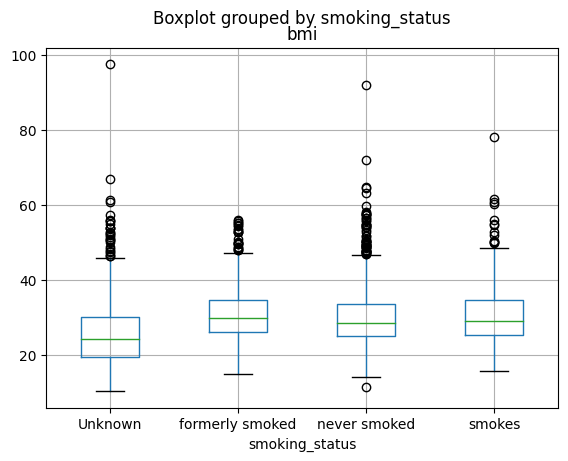

In [38]:
Stroke_df.boxplot('bmi', by='smoking_status')

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ols("bmi ~ C(smoking_status)", data= Stroke_df[Stroke_df['smoking_status'] != 'Unknown']).fit()

model = ols('bmi ~ C(smoking_status)', data=Stroke_df[Stroke_df['smoking_status'] != 'Unknown']).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(smoking_status),397.386136,2.0,3.738626,0.023884
Residual,181918.824457,3423.0,NaN,NaN


In [ ]:
""" Noticeably when i performed the analysis including the 'Unknown' in smoking_status,
    P-value become very low 6.947847e-82.
    
    From the above analysis, since P-value<0.05, we accept alternate hypothesis.
    
    While saying we accept Ha instead of Fail to accept Ho, we should also consider the science 
    behind bmi and smoking metrics. 
                                                                                """

In [ ]:
"""
                                      TWO-WAY ANOVA HYPOTHESIS TEST
                                       
    Conditions: (i)   Independence of variables
                (ii)  Homoscedasticity 
                (iii) We assume that the data is normally distributed

    Null Hypothesis Ho: Residence_type and work_type have NO effect on avg_glucose_level
    Alternate Hypothesis Ha: Residence_type and work_type have considerable effect on avg_glucose_level
    confidence level, α is 0.05 or 5%
                                                                                       """

Useful links: [Two-way ANOVA conditions](https://www.wallstreetmojo.com/two-way-anova/), [Ordinary least squares-ols](https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/)

In [7]:
print('Unique Residence_type values:',Stroke_df['Residence_type'].unique())
print('Unique work_type values:', Stroke_df['work_type'].unique())

Unique Residence_type values: ['Urban' 'Rural']
Unique work_type values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [18]:
ols("avg_glucose_level ~ Residence_type + work_type + Residence_type:work_type", data=Stroke_df).fit()

model = ols('avg_glucose_level ~ Residence_type + work_type + Residence_type:work_type', data=Stroke_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
Residence_type,3.061417e+02,1.0,0.151061,6.975395e-01
work_type,1.346650e+05,4.0,16.612133,1.559384e-13
Residence_type:work_type,5.906930e+03,4.0,0.728673,5.722461e-01
Residual,1.033569e+07,5100.0,NaN,NaN


In [ ]:
"""  
    -->From the above analysis, since P-value>0.05, we fail to reject null hypothesis.
    -->Noticeably, we can see that the P-value for C(Residence_type) ~ 17.96 > 0.05 which indicates it doesn't have
    much impact on glucose level. 
    -->Reason for this might be because of smaller dataset or the fact that even rural
    people do get diabetes as much as urban people these days.

                                                                                """